## ............................................................................................................

#  .................... COVID-19 Mortality Prediction ...................

This project was done to determine the relationship between the severity of chronic illness and death on COVID-19 patients.

## ............................................................................................................

In [1]:
import sklearn
from sklearn import preprocessing 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

## Data Collection and Exploration

In [13]:
df = pd.read_csv("/Users/mac/Desktop/rgle/covid.csv")

In [14]:
df.shape

(566602, 23)

In [15]:
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

In [17]:
df.describe()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
count,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000
mean,1.506726,1.215165,76.562952,1.846262,42.622483,50.400692,2.210633,2.280221,2.265029,2.319628,2.145774,2.410030,2.286157,2.138905,2.283765,2.238360,31.573034,1.728651,76.562864
std,0.499955,0.410937,39.058676,0.560939,16.659973,47.501579,5.683523,5.327832,5.334658,5.667381,5.459866,6.489959,5.438405,5.395578,5.393232,5.571901,45.082123,0.658710,39.059060
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,97.000000,2.000000,31.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,97.000000
50%,2.000000,1.000000,97.000000,2.000000,41.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000
75%,2.000000,1.000000,97.000000,2.000000,53.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000,97.000000
max,2.000000,2.000000,99.000000,99.000000,120.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,3.000000,99.000000


In [18]:
# Convert death date to 0 and 1
# if not 9999-99-99 that means patient died due to COVID-19 put him as 1
# 0 indicated that patient survived
df['death'] = df['date_died'].apply(lambda x: 0 if x == '9999-99-99' else 1)

In [19]:
df['death'].head(10)

0    0
1    0
2    0
3    0
4    1
5    1
6    0
7    0
8    0
9    0
Name: death, dtype: int64

In [20]:
# Check null values
# in dataset description 97-98-99 means unknown so we will deal with this later

df.isna().any()

id                     False
sex                    False
patient_type           False
entry_date             False
date_symptoms          False
date_died              False
intubed                False
pneumonia              False
age                    False
pregnancy              False
diabetes               False
copd                   False
asthma                 False
inmsupr                False
hypertension           False
other_disease          False
cardiovascular         False
obesity                False
renal_chronic          False
tobacco                False
contact_other_covid    False
covid_res              False
icu                    False
death                  False
dtype: bool

In [21]:
df['death'].value_counts().to_frame()

,death
0,530426
1,36176


In [22]:
# in dataset description 97-98-99 means unknown so we will deal with this 
df['pregnancy'].value_counts().to_frame()

,pregnancy
97,287112
2,273840
1,4063
98,1587


In [23]:
df['pneumonia'].value_counts().to_frame()

,pneumonia
2,478416
1,88175
99,11


In [24]:
#add death to the original dataframe 
df = df.assign(death = df['death'])

In [25]:
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,death
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,1,97,0
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,99,1,97,0
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,1,2,2,99,1,2,0
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,99,1,2,0
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,1,2,1,2,2,2,99,1,2,1


In [26]:
# Dropping unneeded columns to perpare our dataset
df.drop(['inmsupr','other_disease','covid_res','id','patient_type','entry_date','date_symptoms','pregnancy'],axis=1,inplace=True)
df.head()

,sex,date_died,intubed,pneumonia,age,diabetes,copd,asthma,hypertension,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,icu,death
0,2,9999-99-99,97,2,27,2,2,2,2,2,2,2,2,2,97,0
1,2,9999-99-99,97,2,24,2,2,2,2,2,2,2,2,99,97,0
2,1,9999-99-99,2,2,54,2,2,2,2,2,1,2,2,99,2,0
3,2,9999-99-99,2,1,30,2,2,2,2,2,2,2,2,99,2,0
4,1,22-04-2020,2,2,60,1,2,2,1,1,2,2,2,99,2,1


In [27]:
# Also date_died because we converted it to death column
df.drop(['date_died'],axis=1,inplace=True)
df.head()

,sex,intubed,pneumonia,age,diabetes,copd,asthma,hypertension,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,icu,death
0,2,97,2,27,2,2,2,2,2,2,2,2,2,97,0
1,2,97,2,24,2,2,2,2,2,2,2,2,99,97,0
2,1,2,2,54,2,2,2,2,2,1,2,2,99,2,0
3,2,2,1,30,2,2,2,2,2,2,2,2,99,2,0
4,1,2,2,60,1,2,2,1,1,2,2,2,99,2,1


# Visualization 

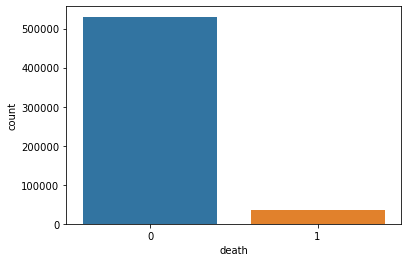

In [28]:
import seaborn as sns
sns.countplot(x=df['death'], data=df);

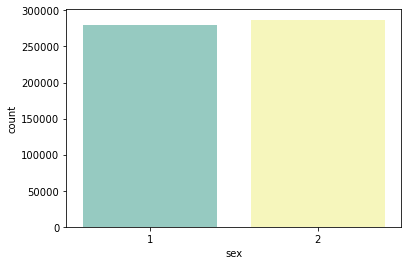

In [29]:
sns.countplot(x="sex", data=df, palette="Set3");

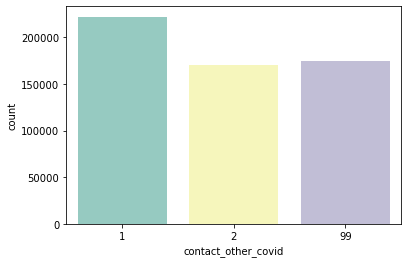

In [30]:
sns.countplot(x="contact_other_covid", data=df, palette="Set3");

In [31]:
#replace all missing values (97,98 and 99) with nan
temp = df['age'] # save age - you do not want to drop old people!
df = df.replace([97,98,99], [np.nan for i in range(3)])
df['age'] = temp

In [32]:
# replace all 1,2 values with 0,1
temp = df[['age','death']] # save age and death
df = df.replace([1,2], [0,1])
df[['age','death']] = temp

In [33]:
# update index
df = df.reset_index(drop=True)

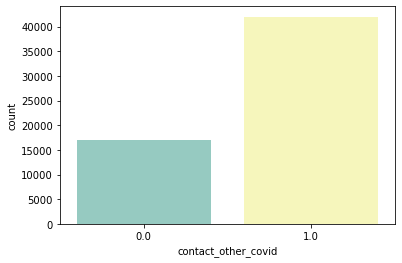

In [87]:
sns.countplot(x="contact_other_covid", data=df, palette="Set3");

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sex                  566602 non-null  float64
 1   intubed              121789 non-null  float64
 2   pneumonia            566591 non-null  float64
 3   age                  566602 non-null  int64  
 4   diabetes             564621 non-null  float64
 5   copd                 564853 non-null  float64
 6   asthma               564850 non-null  float64
 7   hypertension         564778 non-null  float64
 8   cardiovascular       564780 non-null  float64
 9   obesity              564821 non-null  float64
 10  renal_chronic        564810 non-null  float64
 11  tobacco              564695 non-null  float64
 12  contact_other_covid  391571 non-null  float64
 13  icu                  121788 non-null  float64
 14  death                566602 non-null  float64
dtypes: float64(14), i

In [36]:
#check to null values 
df.isna().sum()

sex                         0
intubed                444813
pneumonia                  11
age                         0
diabetes                 1981
copd                     1749
asthma                   1752
hypertension             1824
cardiovascular           1822
obesity                  1781
renal_chronic            1792
tobacco                  1907
contact_other_covid    175031
icu                    444814
death                       0
dtype: int64

In [37]:
df=df.dropna()#remove null 

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59068 entries, 21 to 566591
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  59068 non-null  float64
 1   intubed              59068 non-null  float64
 2   pneumonia            59068 non-null  float64
 3   age                  59068 non-null  int64  
 4   diabetes             59068 non-null  float64
 5   copd                 59068 non-null  float64
 6   asthma               59068 non-null  float64
 7   hypertension         59068 non-null  float64
 8   cardiovascular       59068 non-null  float64
 9   obesity              59068 non-null  float64
 10  renal_chronic        59068 non-null  float64
 11  tobacco              59068 non-null  float64
 12  contact_other_covid  59068 non-null  float64
 13  icu                  59068 non-null  float64
 14  death                59068 non-null  float64
dtypes: float64(14), int64(1)
memory us

In [39]:
df['intubed'].value_counts()

1.0    51376
0.0     7692
Name: intubed, dtype: int64

In [40]:
df['death'].value_counts()

0.0    46950
1.0    12118
Name: death, dtype: int64

In [41]:
df['age'].value_counts()

56     1397
52     1334
50     1293
60     1283
51     1282
       ... 
109       1
115       1
118       1
104       1
103       1
Name: age, Length: 110, dtype: int64

In [42]:
df['sex'].value_counts()# 1=male , 0 = female

1.0    35687
0.0    23381
Name: sex, dtype: int64

In [43]:
df['diabetes'].value_counts()# 0=yes, 1 = no

1.0    42708
0.0    16360
Name: diabetes, dtype: int64

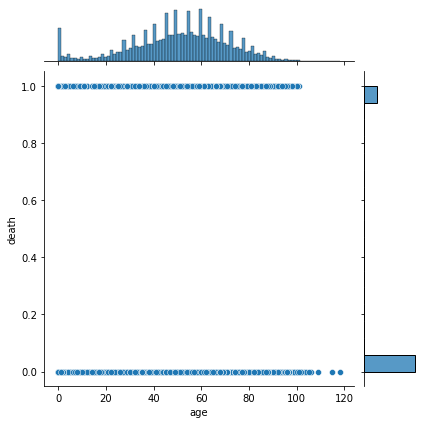

In [44]:
sns.jointplot(x='age', y='death', data=df, kind='scatter');

# Data Modeling and Prediction
### using Logistic Regression Calssifier

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [46]:
#X = are the features , y is the target we want to predict
# split features and target
X = df.loc[:, df.columns != 'death'].values
y = np.array(df['death'])

In [47]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [48]:
df.head()

,sex,intubed,pneumonia,age,diabetes,copd,asthma,hypertension,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,icu,death
21,0.0,1.0,1.0,25,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
30,0.0,1.0,1.0,52,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
50,1.0,0.0,0.0,57,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
71,0.0,1.0,0.0,51,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
79,0.0,0.0,0.0,67,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


In [51]:
lr = LogisticRegression()

In [52]:
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8233003603647181

In [53]:
y_predict = lr.predict(X_test)

# Evaluation
#### Compare Accuracy!

In [54]:
lr.score(X_train, y_train)

0.8233003603647181

In [55]:
accuracy_score(y_test, y_predict)

0.8259127588736527

In [56]:
print(confusion_matrix(y_test, y_predict))

[[13502   590]
 [ 2495  1134]]


In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.84      0.96      0.90     14092
         1.0       0.66      0.31      0.42      3629

    accuracy                           0.83     17721
   macro avg       0.75      0.64      0.66     17721
weighted avg       0.81      0.83      0.80     17721



From results above, we can deduce that our model performed good and the model is just fitting.